# Sampling

## What is Sampling?
Sampling is the process of selecting a subset of individuals or observations from a larger population or dataset. This subset, called a sample, is used to make inferences about the whole population without the need to collect data from every individual. In the context of machine learning, sampling plays a critical role in training models efficiently and effectively.

# Example of Sampling in Machine Learning

### Scenario
A data scientist wants to build a predictive model for housing prices in a city.

1. **Population**: The entire dataset containing details of all houses sold in the city, which could number in the hundreds of thousands.

2. **Sampling Process**:
   - **Step 1**: Define the sample size. The data scientist decides to use a sample of 5,000 houses to keep the computation manageable.
   - **Step 2**: Choose a sampling method. The data scientist opts for **stratified sampling** to ensure that various price ranges and neighborhoods are represented. The population is divided into strata based on price ranges (e.g., low, medium, high) and neighborhoods.
   - **Step 3**: Randomly select individuals from each stratum. For example, the data scientist randomly selects 1,000 houses from each of the price ranges.

3. **Data Collection**: The data scientist gathers features such as square footage, number of bedrooms, and proximity to amenities for each selected house.

4. **Analysis**: After collecting the data, the data scientist trains a regression model on the sample to predict housing prices based on the collected features.

5. **Inference**: The model's performance is evaluated, and insights about the relationships between features and prices are drawn, allowing for better predictions across the entire population.

### Conclusion
In this example, sampling allowed the data scientist to build a predictive model efficiently without using the entire dataset. By carefully selecting a representative sample, the model can generalize its predictions to the broader population while saving computational resources.

## Why is Sampling Important in Machine Learning?
Sampling is crucial in machine learning for several reasons:

1. **Cost-Effectiveness**: Training on an entire dataset can be resource-intensive and time-consuming. Sampling allows data scientists to gather insights while minimizing computational costs.
  
2. **Feasibility**: In many cases, it is impractical or impossible to access the entire dataset (e.g., when dealing with streaming data).

3. **Speed**: Analyzing a smaller sample can lead to quicker model training and evaluation, which is essential in time-sensitive applications.

4. **Statistical Inference**: Properly conducted sampling allows for the generalization of model performance from the sample to the broader dataset, facilitating hypothesis testing and model validation.

5. **Overfitting Prevention**: By using sampling techniques like cross-validation, data scientists can prevent models from overfitting to specific data points, ensuring better generalization.

## Different Types of Sampling in Machine Learning
Sampling methods can be broadly classified into two categories: **probability sampling** and **non-probability sampling**.

### 1. Probability Sampling
In probability sampling, every member of the population has a known and non-zero chance of being selected. This type of sampling supports statistical inference. Common techniques include:

- **Simple Random Sampling**: Each data point has an equal chance of being selected. This can be achieved using random number generators.

$$
  P(X = x_i) = \frac{1}{N}
$$
  where \(N\) is the total population size, and \(x_i\) is an individual in the population.

- **Stratified Sampling**: The dataset is divided into subgroups (strata) based on specific characteristics, and samples are drawn from each stratum.

  $$
  n_h = \frac{N_h}{N} \times n
  $$
  where \(n_h\) is the sample size for stratum \(h\), \(N_h\) is the population size of stratum \(h\), \(N\) is the total population size, and \(n\) is the overall sample size.

- **Systematic Sampling**: A starting point is selected randomly, and then every \(k^{th}\) data point is chosen.

  $$
  k = \frac{N}{n}
  $$
  where \(k\) is the sampling interval, \(N\) is the total population size, and \(n\) is the desired sample size.

- **Cluster Sampling**: The dataset is divided into clusters, and entire clusters are randomly selected.

### 2. Non-Probability Sampling
In non-probability sampling, not all data points have a chance of being selected. This method is often quicker and less expensive but can introduce bias. Common techniques include:

- **Convenience Sampling**: Samples are taken from a group that is easily accessible.

- **Judgmental Sampling**: The researcher selects data points based on their judgment about which would be most informative.

- **Snowball Sampling**: Existing data points help recruit new data points for inclusion.

- **Quota Sampling**: The researcher ensures equal representation of specific characteristics in the sample.

### 3. Importance Sampling
Importance sampling is a technique used to improve the efficiency of estimating properties of a particular distribution while only having samples generated from a different distribution. It is particularly useful in scenarios where direct sampling from the target distribution is difficult or expensive.

- **How It Works**: In importance sampling, you draw samples from a proposal distribution \(q(x)\) that is easy to sample from and then weigh these samples according to their importance for the target distribution \(p(x)\).

  $$
  w(x_i) = \frac{p(x_i)}{q(x_i)}
  $$

  where \(w(x_i)\) is the weight for sample \(x_i\), \(p(x)\) is the target distribution, and \(q(x)\) is the proposal distribution.

- **Expected Value Estimation**: The expected value of a function \(f(x)\) with respect to the target distribution can be estimated as:

  $$
  E_p[f(X)] \approx \frac{1}{n} \sum_{i=1}^{n} f(x_i) w(x_i)
  $$

  where \(X\) are samples drawn from the proposal distribution.

- **Applications**: Importance sampling is widely used in various machine learning applications, including reinforcement learning (RL) to improve policy evaluation and optimization, and in Bayesian inference to approximate posterior distributions when the direct computation is infeasible.

## Conclusion
Sampling is a foundational concept in statistics and research, enabling efficient data collection and analysis. In machine learning, understanding the different types of sampling methods, including importance sampling, is crucial for selecting the appropriate approach based on the research objectives and the nature of the dataset. By using effective sampling techniques, data scientists can build robust models that generalize well to unseen data.


Bootstrap Mean: 6.999811172485352
95% Confidence Interval: [5.333333492279053, 8.666666984558105]


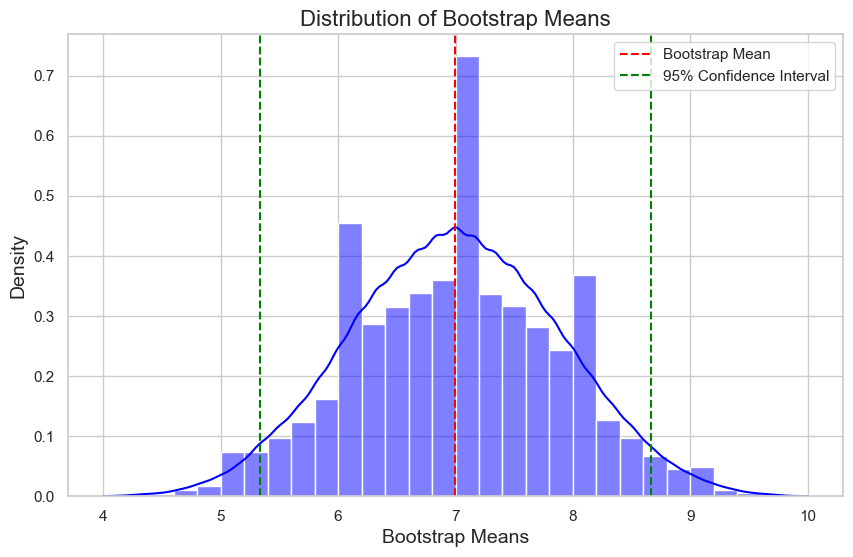

In [14]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Example dataset
data = torch.tensor([4, 5, 6, 8, 9, 10], dtype=torch.float)

# Number of bootstrap samples
num_bootstrap_samples = 100000

# Array to store bootstrap means
bootstrap_means = torch.empty(num_bootstrap_samples)

# Bootstrapping process
for i in range(num_bootstrap_samples):
    # Generate a bootstrap sample with replacement
    bootstrap_sample_indices = torch.randint(low=0, high=len(data), size=(len(data),))
    bootstrap_sample = data[bootstrap_sample_indices]
    
    # Calculate the mean of the bootstrap sample
    bootstrap_means[i] = bootstrap_sample.mean()

# Calculate the mean and the 95% confidence interval
bootstrap_mean = bootstrap_means.mean()
confidence_interval = torch.quantile(bootstrap_means, torch.tensor([0.025, 0.975]))

# Output the results
print("Bootstrap Mean:", bootstrap_mean.item())
print("95% Confidence Interval:", confidence_interval.tolist())

# Plotting
plt.figure(figsize=(10, 6))

# Histogram of bootstrap means
sns.histplot(bootstrap_means.numpy(), bins=30, kde=True, color='blue', stat='density')

# Plot the mean and confidence interval
plt.axvline(bootstrap_mean.item(), color='red', linestyle='--', label='Bootstrap Mean')
plt.axvline(confidence_interval[0].item(), color='green', linestyle='--', label='95% Confidence Interval')
plt.axvline(confidence_interval[1].item(), color='green', linestyle='--')

# Labels and Title
plt.title('Distribution of Bootstrap Means', fontsize=16)
plt.xlabel('Bootstrap Means', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()


# Importance Sampling

Importance sampling is a statistical technique used in various fields, including reinforcement learning (RL), to estimate properties of a particular distribution while sampling from a different distribution. This method is particularly useful in scenarios where direct sampling from the target distribution is difficult or expensive. Here’s a detailed explanation:

## Definition
Importance sampling involves:
1. **Target Distribution (\( p(x) \))**: The distribution we want to estimate or sample from.
2. **Proposal Distribution (\( q(x) \))**: A different distribution from which we can easily sample. It should cover the support of the target distribution.

The fundamental idea is to weigh the samples drawn from the proposal distribution to make them representative of the target distribution.

## Mathematical Representation
The expectation of a function \( f(x) \) under the target distribution can be expressed as:

$$
\mathbb{E}_{p}[f(X)] = \int f(x) p(x) \, dx
$$

Using importance sampling, we can rewrite this expectation in terms of the proposal distribution:

$$
\mathbb{E}_{p}[f(X)] = \int f(x) \frac{p(x)}{q(x)} q(x) \, dx
$$

This allows us to approximate the expectation by sampling from \( q(x) \):

$$
\mathbb{E}_{p}[f(X)] \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i) \frac{p(x_i)}{q(x_i)}
$$

Where \( x_i \) are samples drawn from the proposal distribution \( q \).

## Steps for Importance Sampling
1. **Choose a Proposal Distribution**: Select a distribution \( q(x) \) that is easy to sample from and covers the support of \( p(x) \).
2. **Sample from \( q(x) \)**: Draw samples \( x_1, x_2, \ldots, x_N \) from \( q(x) \).
3. **Compute Weights**: For each sample, compute the importance weight:

   $$
   w_i = \frac{p(x_i)}{q(x_i)}
   $$

4. **Estimate the Expectation**: Use the weighted samples to estimate the expectation:

   $$
   \mathbb{E}_{p}[f(X)] \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i) w_i
   $$

## Applications in Reinforcement Learning
In reinforcement learning, importance sampling is often used in off-policy learning. Here are a few applications:

1. **Off-Policy Evaluation**: In off-policy methods, an agent learns from experiences generated by a different policy (behavior policy) than the one currently being improved (target policy). Importance sampling allows the agent to weigh experiences based on the likelihood of actions taken under the target policy compared to the behavior policy.

   - The importance sampling ratio for an action taken in a given state can be expressed as:

   $$
   \rho_t = \frac{\pi(a_t | s_t)}{b(a_t | s_t)}
   $$

   Where:
   - \( \pi(a_t | s_t) \) is the probability of taking action \( a_t \) in state \( s_t \) under the target policy.
   - \( b(a_t | s_t) \) is the probability of taking the same action under the behavior policy.

   The expected return can then be estimated as:

   $$
   \hat{Q}(s, a) = \sum_{t=0}^{T} \rho_t r_t
   $$

2. **Policy Gradient Methods**: Importance sampling can be applied to estimate the gradients of the expected returns when using different policies. This is useful when the agent has collected experiences using a previous policy but wants to evaluate or improve a new policy.




Importance Sampling Estimate of the integral: 3.869957028697405


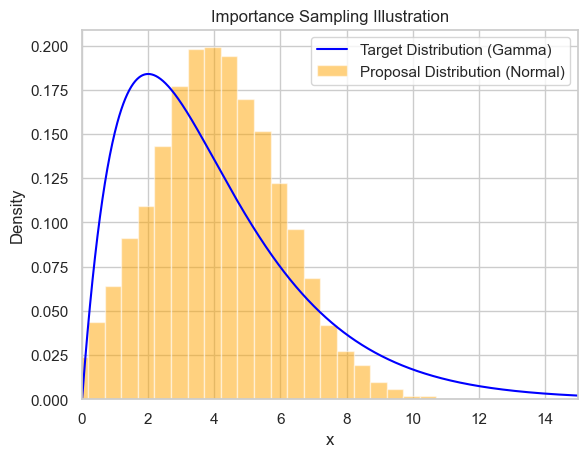

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

# Target distribution: Gamma distribution
def target_distribution(x, k, theta):
    return gamma.pdf(x, a=k, scale=theta)

# Proposal distribution: Normal distribution
def proposal_distribution(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

# Function to integrate
def f(x):
    return x  # For example, we want to estimate the integral of x

# Parameters for the distributions
k = 2.0     # Shape parameter for Gamma distribution
theta = 2.0 # Scale parameter for Gamma distribution
mu = 4.0    # Mean for Normal distribution
sigma = 2.0 # Standard deviation for Normal distribution

# Generate samples from the proposal distribution
N = 10000
samples = np.random.normal(mu, sigma, N)

# Compute weights
weights = target_distribution(samples, k, theta) / proposal_distribution(samples, mu, sigma)

# Importance sampling estimate
estimate = np.sum(weights * f(samples)) / np.sum(weights)

# Print the estimate
print(f"Importance Sampling Estimate of the integral: {estimate}")

# Plotting
x = np.linspace(0, 15, 1000)
plt.plot(x, target_distribution(x, k, theta), label='Target Distribution (Gamma)', color='blue')
plt.hist(samples, density=True, bins=30, alpha=0.5, label='Proposal Distribution (Normal)', color='orange')
plt.title('Importance Sampling Illustration')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 15)
plt.show()


# Sampling in Machine Learning, Deep Learning, and Reinforcement Learning

## 1. Machine Learning (ML)

### Random Sampling in Training Data
- **Example**: When training a classification model (e.g., logistic regression), a large dataset can be overwhelming. Instead, you can randomly sample a subset of the data to create a training set. This reduces computational costs while still allowing for effective model training.

### Stratified Sampling
- **Example**: In medical studies, if you want to build a model to predict a disease, you might use stratified sampling to ensure that your training data includes a representative number of samples from different demographic groups (e.g., age, gender). This helps avoid biases in the model.

### Cross-Validation
- **Example**: In k-fold cross-validation, the dataset is divided into \(k\) subsets. Each subset is used as a validation set while the remaining \(k-1\) subsets are used for training. This method ensures that every sample in the dataset is used for both training and validation, helping to evaluate model performance more robustly.

### Bootstrapping
- **Example**: Bootstrapping is a resampling technique that involves repeatedly drawing samples from the training dataset, with replacement, to estimate the distribution of a statistic (e.g., the mean or variance). This technique is particularly useful in ensemble methods like Bagging (Bootstrap Aggregating).

### Sampling for Imbalanced Datasets
- **Example**: In situations where one class is significantly underrepresented (like fraud detection), you can use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples of the minority class to balance the dataset.

---

## 2. Deep Learning (DL)

### Mini-Batch Sampling
- **Example**: In training neural networks, mini-batch gradient descent involves sampling a small batch of training data (instead of using the entire dataset) to update the model's weights. This speeds up training and allows for better convergence.

### Dropout Sampling
- **Example**: In dropout regularization, during training, random neurons are "dropped out" or set to zero. This sampling technique helps prevent overfitting by ensuring that the model does not rely on specific neurons.

### Data Augmentation
- **Example**: In image classification tasks, sampling techniques can be employed to create augmented data. For instance, random transformations (rotation, flipping, scaling) can be applied to existing images to create new samples, effectively increasing the training dataset.

### Active Learning
- **Example**: In active learning, the model can query a user to label data points it finds uncertain. This targeted sampling approach helps in efficiently building a training dataset by focusing on the most informative samples.

### Reinforcement Learning with Experience Replay
- **Example**: In deep Q-learning, agents can store past experiences in a replay buffer and sample random batches of experiences to train the model. This helps break the correlation between consecutive experiences and leads to more stable training.

---

## 3. Reinforcement Learning (RL)

### Off-Policy Learning with Importance Sampling
- **Example**: In off-policy methods like Q-learning, the agent can learn from experiences generated by a different behavior policy. Importance sampling is used to adjust the contribution of those experiences to the training updates based on the probability of the actions taken under the target policy.

### Monte Carlo Sampling
- **Example**: In Monte Carlo methods, agents sample episodes to estimate the value function or the expected return. These samples help improve the policy based on the outcomes of the sampled trajectories.

### Hierarchical Reinforcement Learning
- **Example**: In hierarchical RL, tasks are divided into subtasks, and the agent samples high-level policies to guide the low-level policies. This sampling from multiple levels helps improve learning efficiency in complex environments.

### Prioritized Experience Replay
- **Example**: In DQN (Deep Q-Networks), instead of uniformly sampling experiences from the replay buffer, experiences are prioritized based on their TD error. This ensures that more significant learning opportunities are sampled more frequently.

### Multi-Agent Reinforcement Learning
- **Example**: In environments with multiple agents (like gaming or robot control), agents can sample from shared experiences to learn policies that consider the actions of other agents. This helps in cooperative or competitive learning scenarios.

---

## Conclusion
Sampling plays a crucial role in enhancing the efficiency and effectiveness of ML, DL, and RL methodologies. By strategically selecting data points or experiences, sampling helps address challenges related to data size, model performance, and learning speed, making it a fundamental aspect of these fields.


In [15]:
import numpy as np
import random

class SamplingMethods:
    def __init__(self, population):
        self.population = np.array(population)

    def simple_random_sampling(self, sample_size):
        """
        Perform simple random sampling without replacement.
        """
        return np.random.choice(self.population, size=sample_size, replace=False)

    def stratified_sampling(self, strata, sample_sizes):
        """
        Perform stratified sampling.
        strata: dict with keys as strata names and values as boolean masks for the population
        sample_sizes: dict with keys as strata names and values as sample sizes for each stratum
        """
        samples = {}
        for stratum, mask in strata.items():
            stratum_population = self.population[mask]
            samples[stratum] = np.random.choice(stratum_population, size=sample_sizes[stratum], replace=False)
        return samples

    def importance_sampling(self, target_pdf, proposal_pdf, num_samples):
        """
        Perform importance sampling.
        target_pdf: target probability density function
        proposal_pdf: proposal probability density function
        num_samples: number of samples to generate
        """
        samples = proposal_pdf(num_samples)
        weights = target_pdf(samples) / proposal_pdf(samples)
        normalized_weights = weights / np.sum(weights)
        return samples, normalized_weights

    def monte_carlo_sampling(self, pdf, num_samples, low, high):
        """
        Perform basic Monte Carlo sampling from a distribution.
        pdf: probability density function
        num_samples: number of samples to generate
        low, high: range of the distribution
        """
        samples = []
        while len(samples) < num_samples:
            x = np.random.uniform(low, high)
            y = np.random.uniform(0, pdf(x))
            if y <= pdf(x):
                samples.append(x)
        return np.array(samples)

# Example usage
if __name__ == "__main__":
    # Create a population
    population = np.random.normal(loc=0, scale=1, size=10000)

    # Initialize the SamplingMethods class
    sampler = SamplingMethods(population)

    # Simple Random Sampling
    srs_sample = sampler.simple_random_sampling(1000)
    print("Simple Random Sample mean:", np.mean(srs_sample))

    # Stratified Sampling
    strata = {
        "low": population < -1,
        "medium": (population >= -1) & (population < 1),
        "high": population >= 1
    }
    sample_sizes = {"low": 200, "medium": 600, "high": 200}
    stratified_samples = sampler.stratified_sampling(strata, sample_sizes)
    for stratum, sample in stratified_samples.items():
        print(f"Stratified Sample {stratum} mean:", np.mean(sample))

    # Importance Sampling
    def target_pdf(x):
        return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

    def proposal_pdf(x):
        return np.exp(-abs(x)) / 2

    samples, weights = sampler.importance_sampling(target_pdf, proposal_pdf, 1000)
    print("Importance Sampling estimate:", np.sum(samples * weights) / np.sum(weights))

    # Monte Carlo Sampling
    def pdf(x):
        return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

    mc_samples = sampler.monte_carlo_sampling(pdf, 1000, -5, 5)
    print("Monte Carlo Sampling mean:", np.mean(mc_samples))

Simple Random Sample mean: 0.0013277608135522634
Stratified Sample low mean: -1.5722144563139182
Stratified Sample medium mean: -0.04841918109249157
Stratified Sample high mean: 1.48655071613274
Importance Sampling estimate: 0.0
Monte Carlo Sampling mean: -0.015198960686462173


TypeError: object of type 'numpy.float64' has no len()

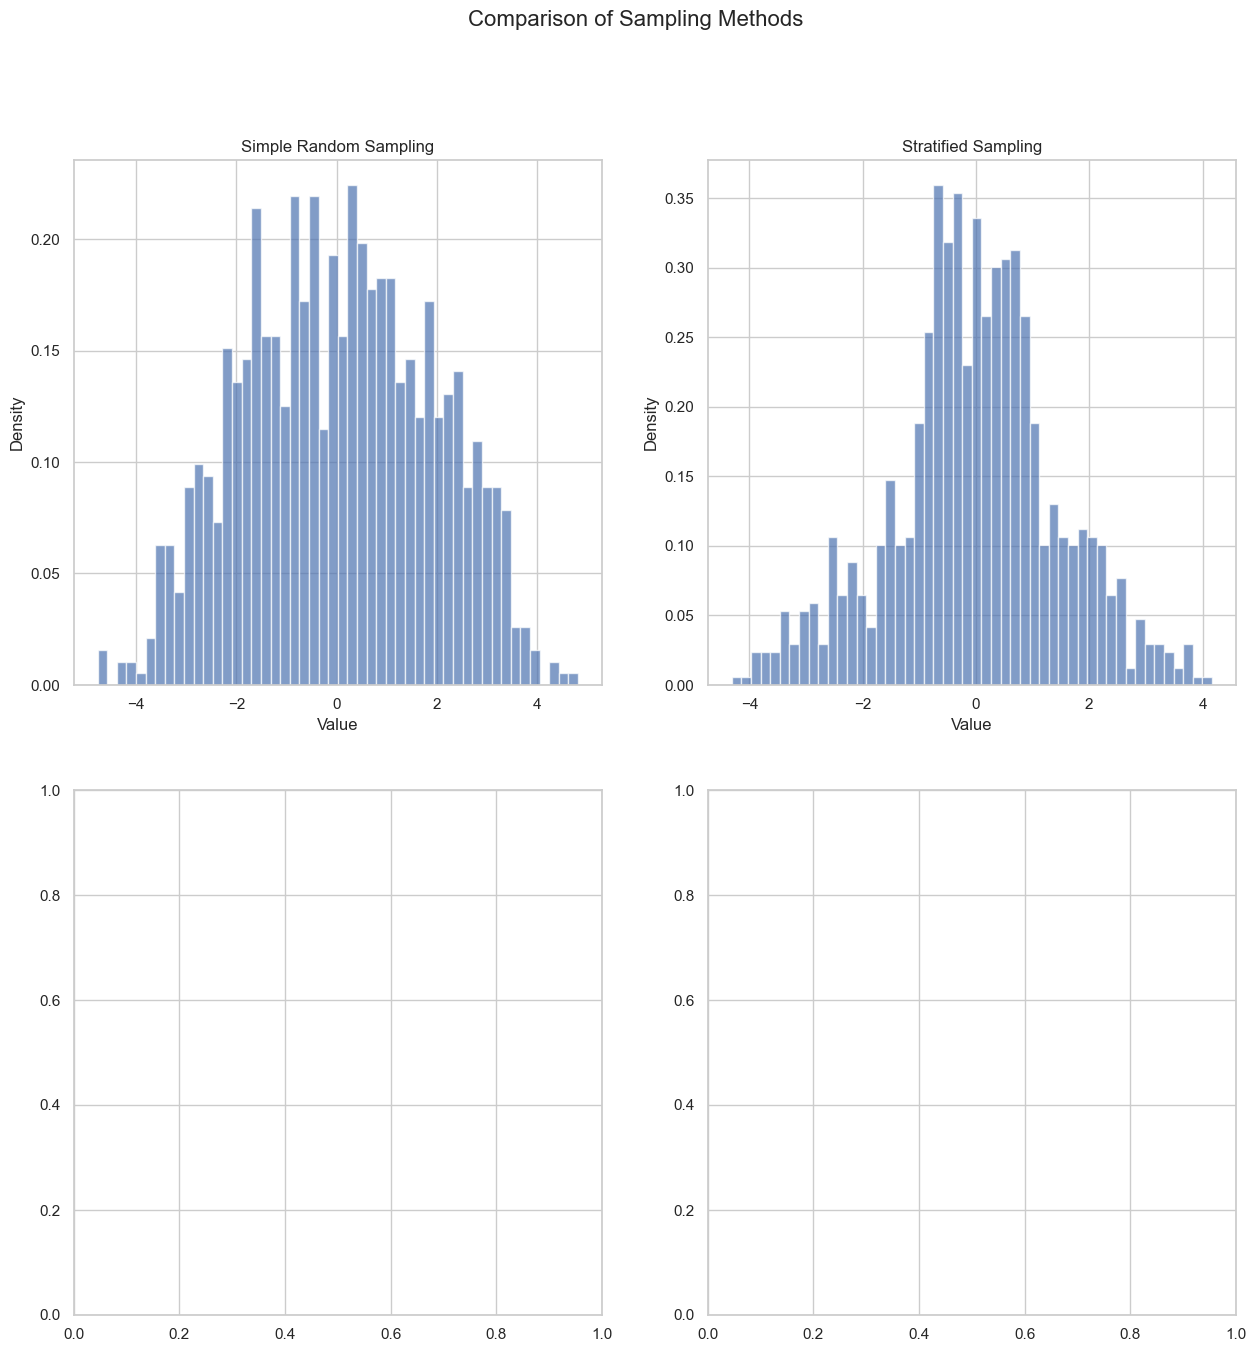

In [20]:
import numpy as np
import matplotlib.pyplot as plt
#from sampling_methods import SamplingMethods

# Create a population
population_size = 10000
population = np.concatenate([
    np.random.normal(loc=-2, scale=1, size=3000),
    np.random.normal(loc=0, scale=1, size=4000),
    np.random.normal(loc=2, scale=1, size=3000)
])

# Initialize the SamplingMethods class
sampler = SamplingMethods(population)

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Comparison of Sampling Methods', fontsize=16)

# Simple Random Sampling
srs_sample = sampler.simple_random_sampling(1000)
axs[0, 0].hist(srs_sample, bins=50, density=True, alpha=0.7)
axs[0, 0].set_title('Simple Random Sampling')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Density')

# Stratified Sampling
strata = {
    "low": population < -1,
    "medium": (population >= -1) & (population < 1),
    "high": population >= 1
}
sample_sizes = {"low": 200, "medium": 600, "high": 200}
stratified_samples = sampler.stratified_sampling(strata, sample_sizes)
stratified_combined = np.concatenate(list(stratified_samples.values()))
axs[0, 1].hist(stratified_combined, bins=50, density=True, alpha=0.7)
axs[0, 1].set_title('Stratified Sampling')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Density')

# Importance Sampling
def target_pdf(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def proposal_pdf(x):
    return np.exp(-abs(x)) / 2

samples, weights = sampler.importance_sampling(target_pdf, proposal_pdf, 1000)
axs[1, 0].hist(samples, bins=50, density=True, weights=weights, alpha=0.7)
axs[1, 0].set_title('Importance Sampling')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Density')

# Monte Carlo Sampling
def pdf(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

mc_samples = sampler.monte_carlo_sampling(pdf, 1000, -5, 5)
axs[1, 1].hist(mc_samples, bins=50, density=True, alpha=0.7)
axs[1, 1].set_title('Monte Carlo Sampling')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Density')

# Plot the true population distribution
x = np.linspace(-6, 6, 1000)
y = (1/3) * (np.exp(-0.5 * (x+2)**2) / np.sqrt(2*np.pi) + 
             np.exp(-0.5 * x**2) / np.sqrt(2*np.pi) + 
             np.exp(-0.5 * (x-2)**2) / np.sqrt(2*np.pi))
for ax in axs.flat:
    ax.plot(x, y, 'r--', linewidth=2, label='True Distribution')
    ax.legend()

plt.tight_layout()
plt.show()

# Print statistics
print("Population mean:", np.mean(population))
print("SRS mean:", np.mean(srs_sample))
print("Stratified mean:", np.mean(stratified_combined))
print("Importance Sampling mean:", np.sum(samples * weights) / np.sum(weights))
print("Monte Carlo mean:", np.mean(mc_samples))